# **Pneumonia Detection**
**A machine learning project for detecting pneumonia from chest X-ray images. It includes data preprocessing, feature extraction, and performance evaluation to aid early diagnosis.**

## **Data Discovery**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, color, transform, feature

### **Data Dimensions**

<Axes: title={'center': 'Testing Set: 0/1 Ratio'}, ylabel='count'>

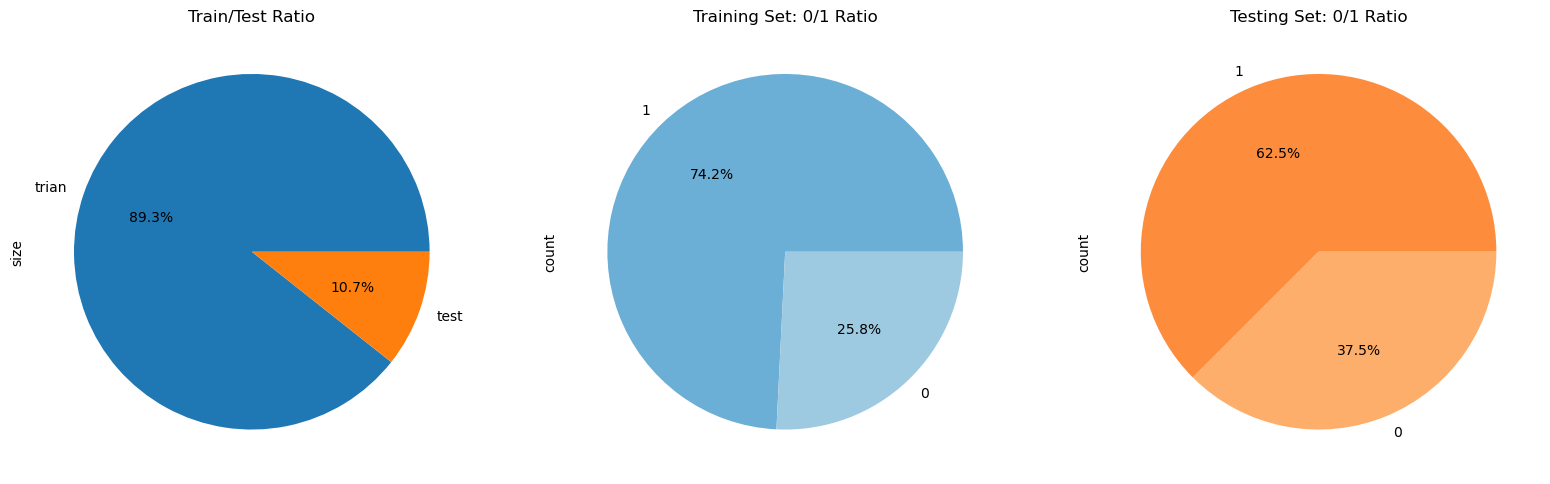

In [2]:
from _data import load_pneumonia
from matplotlib.colors import LinearSegmentedColormap

train, test = load_pneumonia(
  include_raw=True, include_hog=True, include_lbp=True, pca_mode="local"
)

fig, axes = plt.subplots(1, 3, figsize=(19.5, 6.5))

pd.DataFrame(
  [train.shape[0], test.shape[0]], index=["trian", "test"], columns=["size"]
).plot.pie(
  y="size", autopct="%1.1f%%", legend=False, title="Train/Test Ratio", ax=axes[0]
)
pd.DataFrame(train)[2].astype(int).value_counts().plot.pie(
  autopct="%1.1f%%",
  cmap=LinearSegmentedColormap.from_list("train_color", ["#6baed6", "#9ecae1"]),
  title="Training Set: 0/1 Ratio",
  ax=axes[1],
)
pd.DataFrame(test)[2].astype(int).value_counts().plot.pie(
  autopct="%1.1f%%",
  cmap=LinearSegmentedColormap.from_list("test_color", ["#fd8d3c", "#fdae6b"]),
  title="Testing Set: 0/1 Ratio",
  ax=axes[2],
)

### **Extracting HOG and LBP on Normal, Pneumonia(Bacteria), and Pneumonia(Virus) Images**

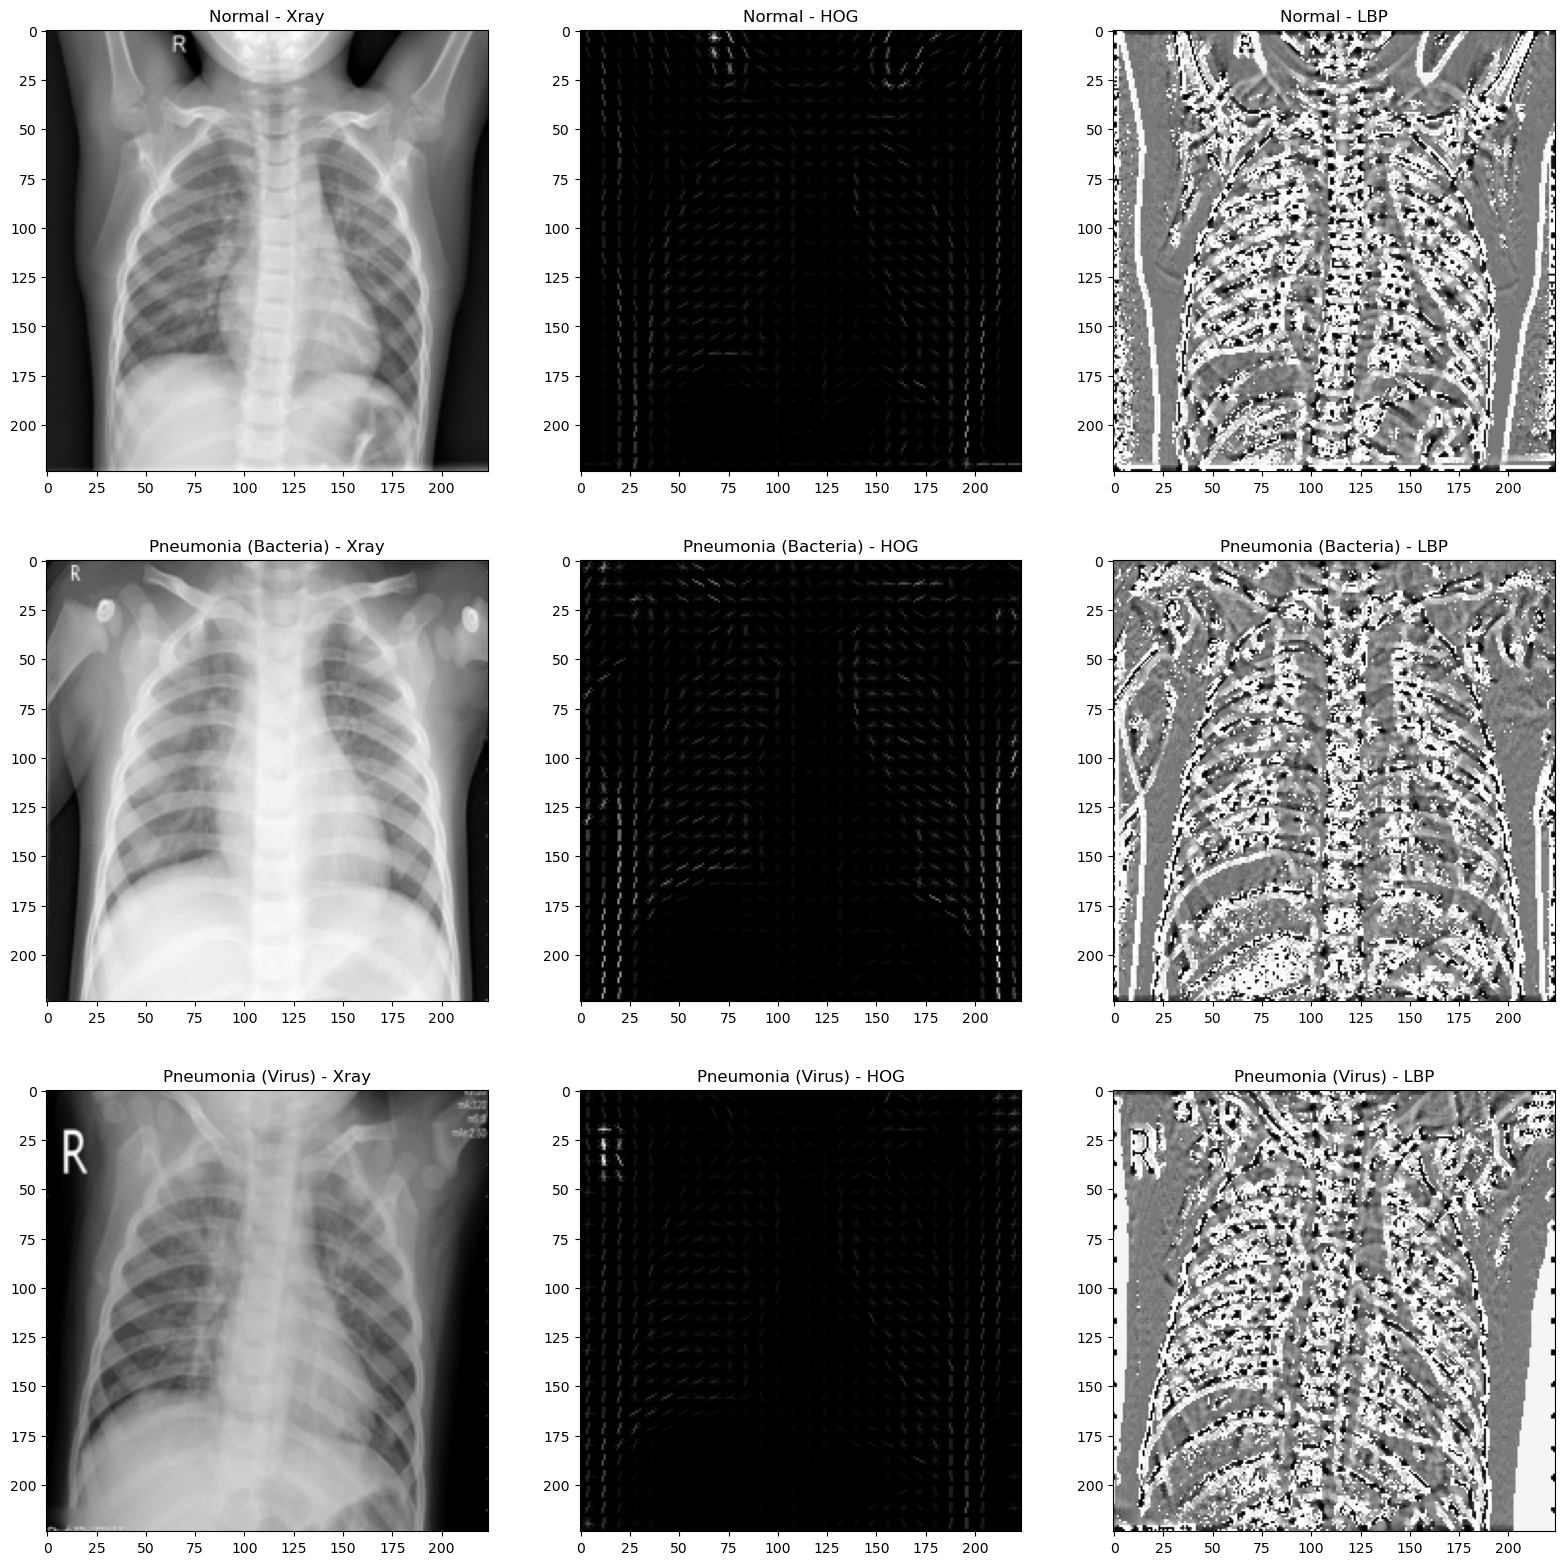

In [3]:
picked_images = [
  {"category": "Normal", "filepath": "./data/train/NORMAL/IM-0115-0001.jpeg"},
  {
    "category": "Pneumonia (Bacteria)",
    "filepath": "./data/train/PNEUMONIA/person1_bacteria_2.jpeg",
  },
  {
    "category": "Pneumonia (Virus)",
    "filepath": "./data/train/PNEUMONIA/person80_virus_150.jpeg",
  },
]

fig, axes = plt.subplots(
  len(picked_images), 3, figsize=(19.5, 6.5 * len(picked_images))
)
ax = axes.ravel()

for index, image in enumerate(picked_images):
  image_file = io.imread(image["filepath"])
  if len(image_file.shape) == 3:
    image_file = color.rgb2gray(image_file)
  image_resized = transform.resize(image_file, (224, 224), preserve_range=True)
  feature_hog, image_hog = feature.hog(
    image_resized,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm="L2-Hys",
    transform_sqrt=True,
    feature_vector=True,
    visualize=True,
  )
  image_lbp = feature.local_binary_pattern(
    image_resized.astype(np.uint8), 24, 3, "uniform"
  )
  ax[index * 3 + 0].imshow(image_resized, cmap="gray")
  ax[index * 3 + 0].set_title(f"{image['category']} - Xray")
  ax[index * 3 + 1].imshow(image_hog, cmap="gray")
  ax[index * 3 + 1].set_title(f"{image['category']} - HOG")
  ax[index * 3 + 2].imshow(image_lbp, cmap="gray")
  ax[index * 3 + 2].set_title(f"{image['category']} - LBP")

### **Applying PCA on a Combination of Original, HOG and LBP features**

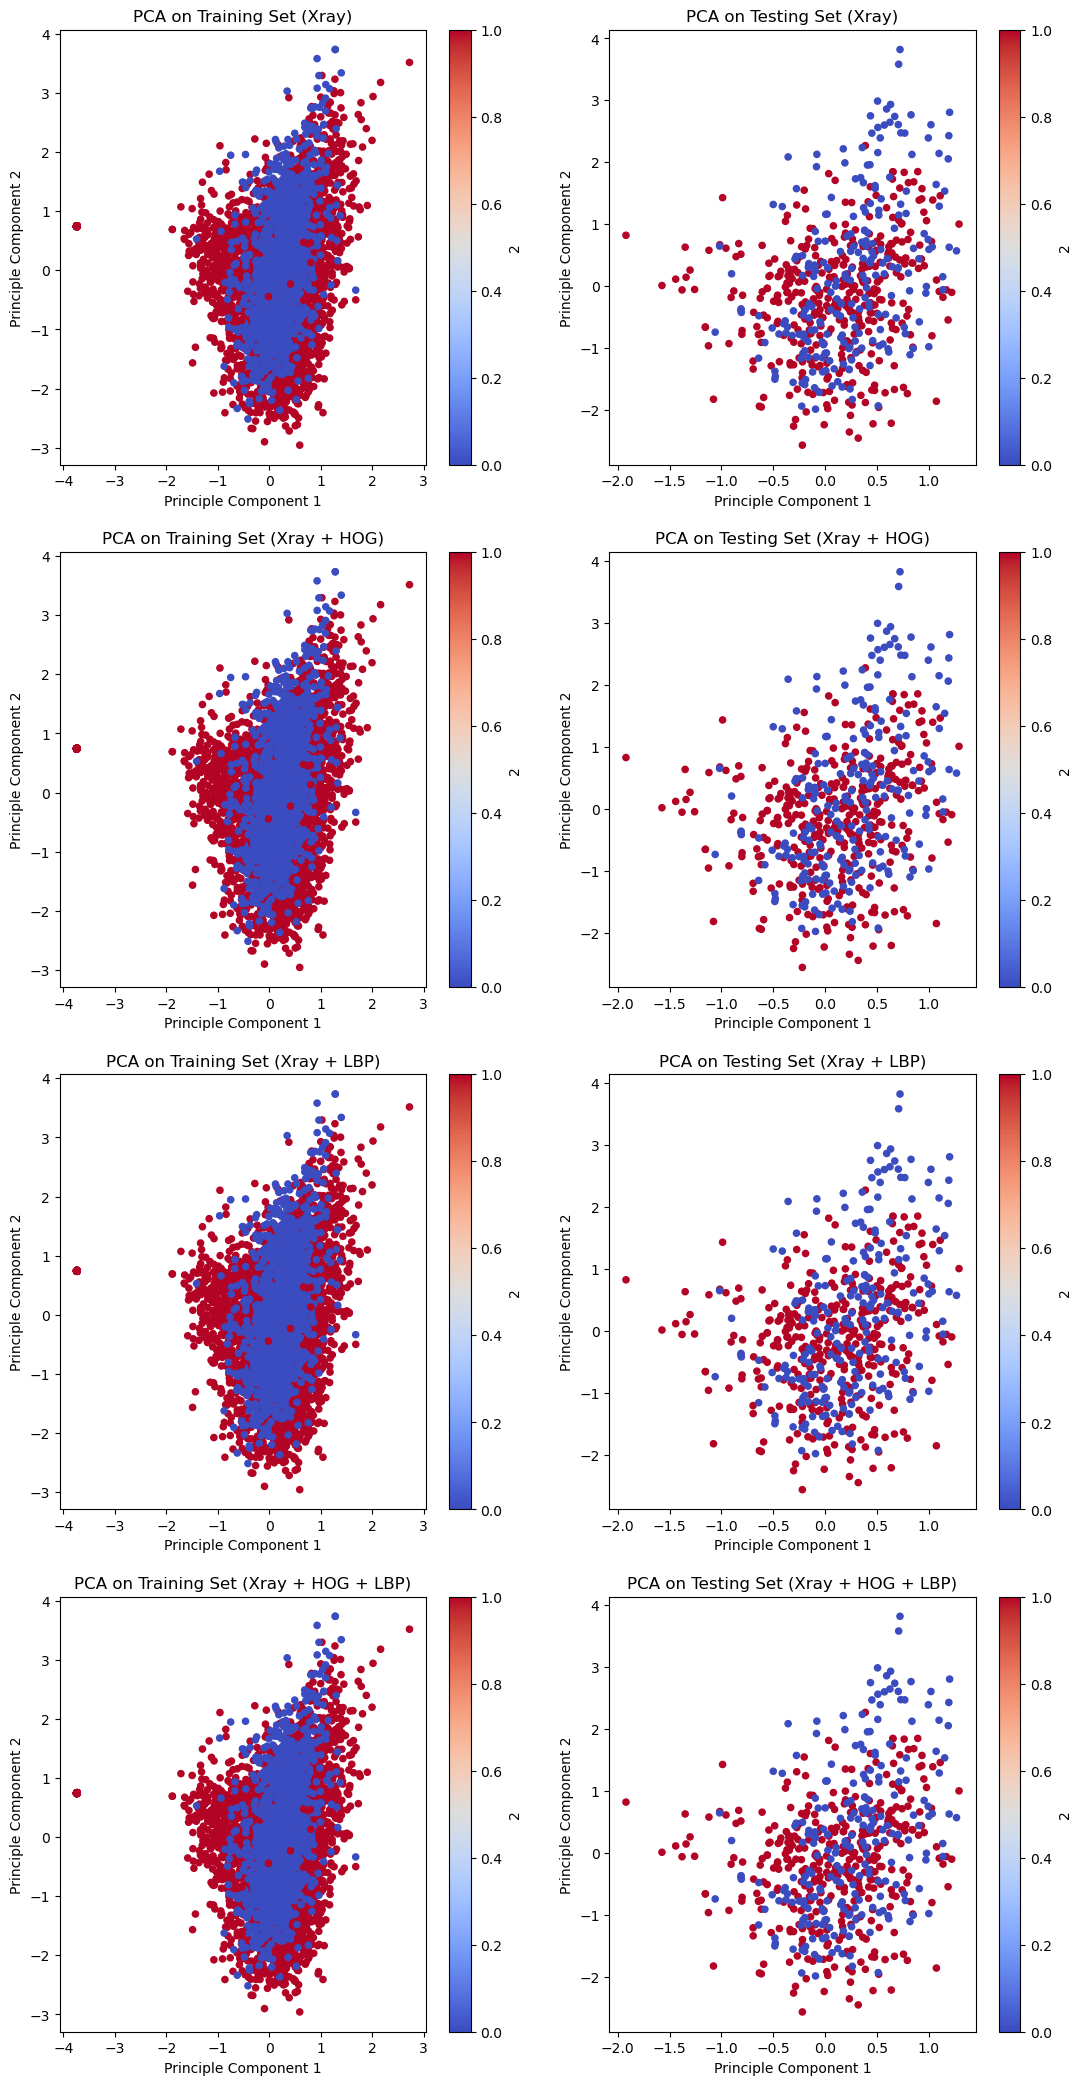

In [4]:
combination = [
  [False, False],
  [True, False],
  [False, True],
  [True, True],
]

fig, axes = plt.subplots(len(combination), 2, figsize=(13, 6.5 * len(combination)))
for index, (hog, lbp) in enumerate(combination):
  train, test = load_pneumonia(
    include_raw=True, include_hog=hog, include_lbp=lbp, pca_mode="local"
  )
  name_component = ["Xray"]
  if hog:
    name_component.append("HOG")
  if lbp:
    name_component.append("LBP")
  subtitle = f"PCA on {'{}'} Set ({' + '.join(name_component)})"
  pd.DataFrame(train).plot.scatter(
    x=0,
    xlabel="Principle Component 1",
    y=1,
    ylabel="Principle Component 2",
    c=2,
    cmap="coolwarm",
    vmax=1,
    title=subtitle.format("Training"),
    ax=axes[index, 0],
  )
  pd.DataFrame(test).plot.scatter(
    x=0,
    xlabel="Principle Component 1",
    y=1,
    ylabel="Principle Component 2",
    c=2,
    cmap="coolwarm",
    vmax=1,
    title=subtitle.format("Testing"),
    ax=axes[index, 1],
  )